In [1]:
import numpy as np
import pandas as pd
import time
import graphviz
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

k = 64

census_data = pd.read_csv('ano-data/census/'+str(k)+'_census.csv',header = 0,sep=',',engine='python',na_values='?')
census_test = pd.read_csv('ano-data/census/'+str(1)+'_census_test.csv',header = 0,sep=',',engine='python',na_values='?')

census_data.drop(census_data.columns[0], axis=1,inplace = True)
census_test.drop(census_test.columns[0], axis=1,inplace = True)

data_feature = census_data.drop(columns=['income']).copy()
data_label = census_data['income'].copy()

test_feature = census_test.drop(columns=['income']).copy()
test_label = census_test['income'].copy()

for i in range(len(test_label)):
    test_label.loc[i]=str(test_label.loc[i]).strip('.')

def Accuracy(predicted, truth):
    correct = 0
    for i in range(len(predicted)):
        if predicted[i]==truth.iloc[i]:
            correct +=1
    return correct/len(predicted)

print("Minimum expected accuracy: "+str(data_label.value_counts().max()/data_label.value_counts().sum()*100))
print("Minimum expected accuracy: "+str(test_label.value_counts().max()/test_label.value_counts().sum()*100))

Minimum expected accuracy: 75.91904425539757
Minimum expected accuracy: 76.3773723972729


In [2]:
#Converting labels to 0-1
for i in range(data_label.shape[0]):
    data_label.iloc[i]=int("<" in data_label.iloc[i])
for i in range(test_label.shape[0]):
    test_label.iloc[i]=int("<" in test_label.iloc[i])

In [3]:
#KNN

K = [1,3,5,10,20,100]
traintimes = np.zeros(len(K))
evaltimes = np.zeros(len(K))
accuracies = np.zeros(len(K))

from sklearn.neighbors import KNeighborsClassifier
for i in range(len(K)):
    start = time.time()
    neigh = KNeighborsClassifier(n_neighbors=K[i])
    neigh.fit(data_feature, data_label)
    traintimes[i] = time.time()-start
    start = time.time()
    prediction = neigh.predict(test_feature)
    evaltimes[i]=time.time()-start
    accuracies[i] = Accuracy(prediction,test_label)

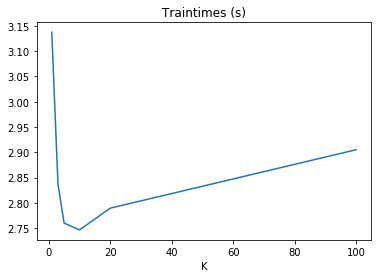

In [4]:
plt.figure()
plt.plot(K,traintimes)
plt.xlabel('K')
plt.title('Traintimes (s)')
plt.savefig("CensusIncome_traintime_noscale.png")

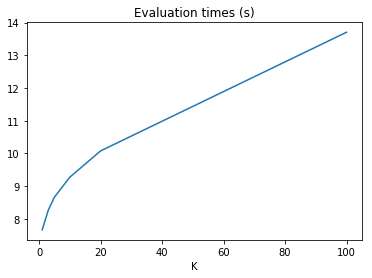

In [5]:
plt.figure()
plt.plot(K,evaltimes)
plt.xlabel('K')
plt.title('Evaluation times (s)')
plt.savefig("CensusIncome_evaltime_noscale.png")

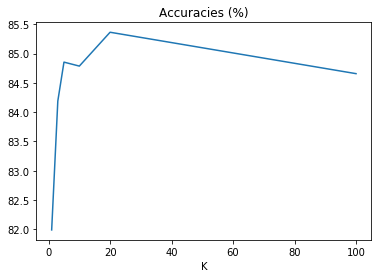

In [6]:
plt.figure()
plt.plot(K,accuracies*100)
plt.xlabel('K')
plt.title('Accuracies (%)')
plt.savefig("CensusIncome_Acc_noscale.png")

In [7]:
#This is probably very important for kNN
#There is a huge conceptual error with this step, since the different one-hot encoded parts of the same category will be treated differently, we should correct it, if we have time
#Right now this reduces the accuracy, but with proper handling i'm sure it can increase too.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_feature = sc.fit_transform(data_feature)
test_feature = sc.transform(test_feature)

In [8]:
pd.DataFrame(data_feature).describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,...,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,-1.573572e-15,-1.177395e-14,7.398794e-15,-1.282205e-14,-3.809806e-15,-3.026221e-14,-3.359672e-14,3.239298e-13,-9.900997e-14,1.929037e-14,...,1.128425e-13,5.523114e-14,1.953971e-14,2.545142e-14,-2.883555e-14,1.287063e-13,1.229052e-14,2.806771e-15,-8.127118e-14,6.575369e-14
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,...,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.605166e+00,-3.044389e+00,-1.459205e-01,-2.166595e-01,-3.194030e+00,-4.164504e-01,-5.323871e-01,-1.279575e+00,-3.019074e-01,-4.485259e-01,...,-2.092906e-01,-1.837843e-01,-2.222678e-01,-9.722106e-02,-5.550333e-02,-1.963946e+00,-7.708120e-01,-1.754026e-01,-4.874548e-01,-1.565236e-01
25%,-8.062832e-01,-4.331828e-01,-1.459205e-01,-2.166595e-01,-3.542945e-02,-4.164504e-01,-5.323871e-01,-9.142787e-01,-3.019074e-01,-4.485259e-01,...,-2.092906e-01,-1.837843e-01,-2.222678e-01,-9.722106e-02,-5.550333e-02,-4.116583e-01,-7.708120e-01,-1.754026e-01,-4.874548e-01,-1.565236e-01
50%,-5.127057e-02,-3.233975e-02,-1.459205e-01,-2.166595e-01,-3.542945e-02,-4.164504e-01,-5.323871e-01,-1.037368e-03,-3.019074e-01,-4.485259e-01,...,-2.092906e-01,-1.837843e-01,-2.222678e-01,-9.722106e-02,-5.550333e-02,-4.116583e-01,-7.708120e-01,-1.754026e-01,-4.874548e-01,-1.565236e-01
75%,7.047535e-01,9.411362e-01,-1.459205e-01,-2.166595e-01,3.695194e-01,-4.164504e-01,5.048718e-01,1.277500e+00,-3.019074e-01,-4.485259e-01,...,-2.092906e-01,-1.837843e-01,-2.222678e-01,-9.722106e-02,-5.550333e-02,1.140630e+00,8.645476e-01,-1.754026e-01,-4.874548e-01,-1.565236e-01
max,2.854595e+00,2.121809e+00,1.339458e+01,1.059351e+01,4.742967e+00,4.889541e+00,3.616649e+00,1.277500e+00,7.716277e+00,3.812902e+00,...,6.033396e+00,7.285697e+00,7.353554e+00,1.621379e+01,1.801694e+01,1.140630e+00,2.499907e+00,6.835177e+00,2.099249e+00,1.237601e+01


In [9]:
#KNN

K = [1,3,5,10,20,100]
traintimes_scal = np.zeros(len(K))
evaltimes_scal = np.zeros(len(K))
accuracies_scal = np.zeros(len(K))

from sklearn.neighbors import KNeighborsClassifier
for i in range(len(K)):
    start = time.time()
    neigh = KNeighborsClassifier(n_neighbors=K[i])
    neigh.fit(data_feature, data_label)
    traintimes_scal[i] = time.time()-start
    start = time.time()
    prediction = neigh.predict(test_feature)
    evaltimes_scal[i]=time.time()-start
    accuracies_scal[i] = Accuracy(prediction,test_label)

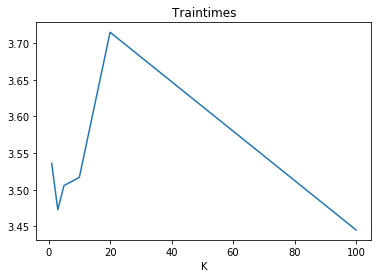

In [10]:
plt.figure()
plt.plot(K,traintimes_scal)
plt.xlabel('K')
plt.title('Traintimes')
plt.savefig("CensusIncome_traintime_scale.png")

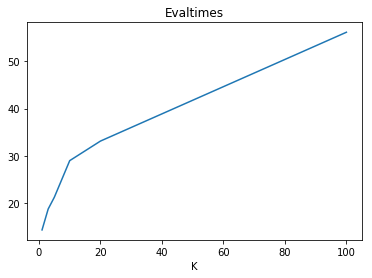

In [11]:
plt.figure()
plt.plot(K,evaltimes_scal)
plt.xlabel('K')
plt.title('Evaltimes')
plt.savefig("CensusIncome_eval_scale.png")

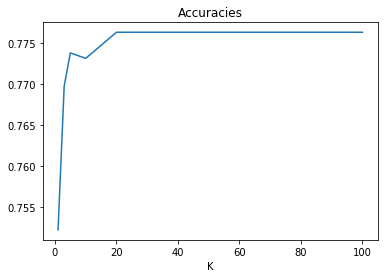

In [12]:
plt.figure()
plt.plot(K,accuracies_scal)
plt.xlabel('K')
plt.title('Accuracies')
plt.savefig("CensusIncome_Acc_scale.png")

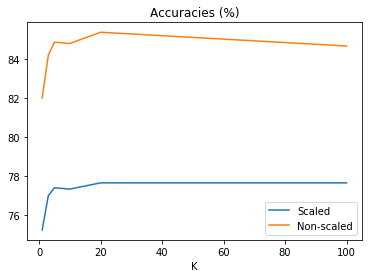

In [13]:
plt.figure()
plt.plot(K,accuracies_scal*100,label = "Scaled")
plt.plot(K,accuracies*100,label= "Non-scaled")
plt.xlabel("K")
plt.title("Accuracies (%)")
plt.legend()
plt.savefig("CensusIncome_Acc_kNN.png")

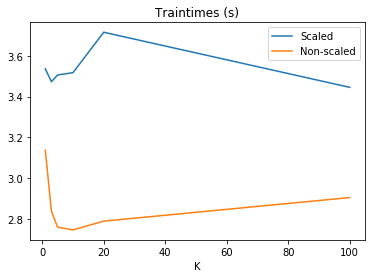

In [14]:
plt.figure()
plt.plot(K,traintimes_scal,label = "Scaled")
plt.plot(K,traintimes,label= "Non-scaled")
plt.xlabel("K")
plt.title("Traintimes (s)")
plt.legend()
plt.savefig("CensusIncome_Train_kNN.png")

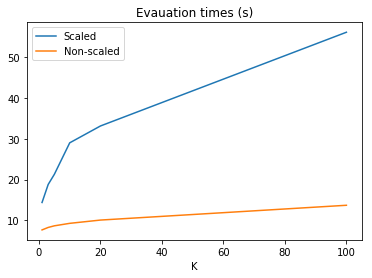

In [15]:
plt.figure()
plt.plot(K,evaltimes_scal,label = "Scaled")
plt.plot(K,evaltimes,label= "Non-scaled")
plt.xlabel("K")
plt.title("Evauation times (s)")
plt.legend()
plt.savefig("CensusIncome_Eval_kNN.png")